In [19]:
from fisher import Fisher
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = [10, 5]

In [20]:
ells_sample_file = "cache/_M/4000_1000/ells.npy"
M_file = "cache/_M/4000_1000/M.npy"

In [21]:
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher = Fisher(N0_file, ells_sample_file, M_file, N0_offset=2)

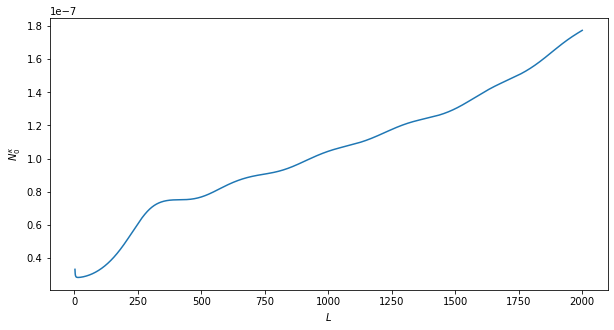

In [22]:
ellmax = 2000
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True)
ells = np.arange(ellmax + 1)
plt.figure()
plt.plot(ells[2:], N0_kappa[2:])
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.show()

In [23]:
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher = Fisher(N0_file, ells_sample_file, M_file)

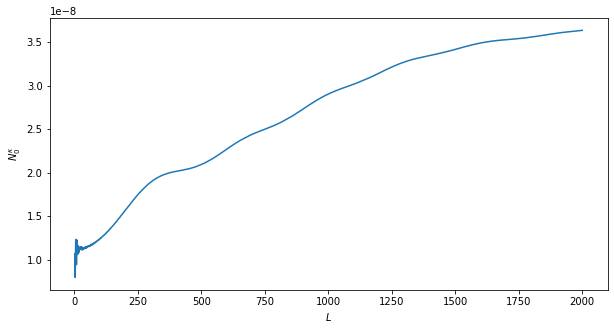

In [24]:
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True, ell_factors=True)
ells = np.arange(ellmax + 1)
plt.figure()
plt.plot(ells[2:], N0_kappa[2:])
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.show()

In [25]:
Lmax = 4000
dL = 10
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher = Fisher(N0_file, ells_sample_file, M_file)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print("No foreground")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground
S/N = 1.504787144056077
---------------------------
Time = 7.826944828033447


In [26]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher = Fisher(N0_file, ells_sample_file, M_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print("baseline")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")


baseline
S/N = 0.499640494630238
---------------------------
Time = 7.89377498626709


In [27]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_base_it_MV.npy"
fisher = Fisher(N0_file, ells_sample_file, M_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print("baseline + it")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

baseline + it
S/N = 0.5052422929670991
---------------------------
Time = 7.805883169174194


In [28]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"
fisher = Fisher(N0_file, ells_sample_file, M_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print("goal + it")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

goal + it
S/N = 0.7472315964371433
---------------------------
Time = 7.965595245361328


In [29]:
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher = Fisher(N0_file, ells_sample_file, M_file)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print("No foreground + one N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground + one N_k
S/N = 2.034106264350092
---------------------------
Time = 7.925270080566406


In [31]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher = Fisher(N0_file, ells_sample_file, M_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print("baseline + one N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

baseline + one N_k
S/N = 0.8134710165325555
---------------------------
Time = 7.912077188491821


In [32]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"
fisher = Fisher(N0_file, ells_sample_file, M_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print("goal + it + one N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

goal + it + one N_k
S/N = 1.1075304224751195
---------------------------
Time = 7.937839031219482


In [41]:
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher = Fisher(N0_file, ells_sample_file, M_file)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print("No foreground + no N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground + no N_k
S/N = 2.793309745185178
---------------------------
Time = 7.800961017608643


In [37]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher = Fisher(N0_file, ells_sample_file, M_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print("baseline + no N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

baseline + no N_k
S/N = 1.2565557439609265
---------------------------
Time = 7.833463907241821


In [38]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"
fisher = Fisher(N0_file, ells_sample_file, M_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print("goal + it + no N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

goal + it + no N_k
S/N = 1.5860798230857782
---------------------------
Time = 7.903465032577515
